In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# This line is needed to use CUDA on my linux box
os.environ['XLA_FLAGS']='--xla_gpu_cuda_data_dir=/usr/lib/cuda'

2023-10-01 16:41:44.921800: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-01 16:41:44.942523: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 16:41:45.245376: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Load datasets

In [2]:
# Load and Preprocess data MNIST data
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

mnist_train_images = np.array([tf.image.resize(img[..., tf.newaxis], [32, 32]).numpy() for img in mnist_train_images])
mnist_test_images = np.array([tf.image.resize(img[..., tf.newaxis], [32, 32]).numpy() for img in mnist_test_images])

mnist_train_labels = to_categorical(mnist_train_labels)
mnist_test_labels = to_categorical(mnist_test_labels)

mnist_train_images = mnist_train_images / 255.0
mnist_test_images = mnist_test_images / 255.0

2023-10-01 16:14:18.714388: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-01 16:14:18.729425: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-01 16:14:18.729498: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Found 80000 images belonging to 200 classes.
Found 20000 images belonging to 200 classes.


In [6]:
# Load and preprocess CIFAR-10 data
(cifar10_train_images, cifar10_train_labels), (cifar10_test_images, cifar10_test_labels) = cifar10.load_data()

# cifar10_train_images = np.array([tf.image.resize(img, [32, 64]).numpy() for img in cifar10_train_images])
# cifar10_test_images = np.array([tf.image.resize(img, [64, 64]).numpy() for img in cifar10_test_images])

cifar10_train_images = cifar10_train_images / 255.0
cifar10_test_images = cifar10_test_images / 255.0

cifar10_train_labels = to_categorical(cifar10_train_labels)
cifar10_test_labels = to_categorical(cifar10_test_labels)

In [11]:
#Load and preprocess Tiny Imagenet data
# rescale images and set aside 20% of data for validation
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2) 

tiny_imagenet_train_gen = data_gen.flow_from_directory(
    '/home/robert/Dev/cs5870-assignment-1/data/tiny-imagenet-200/train',
    target_size=(64, 64),  # Resize to the actual image size
    batch_size=64,
    class_mode='categorical',
    subset='training'  # Specify this is for training data
)

# Validation generator: Similarly, for validation
tiny_imagenet_val_gen = data_gen.flow_from_directory(
    '/home/robert/Dev/cs5870-assignment-1/data/tiny-imagenet-200/train',
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical',
    subset='validation'  # Specify this is for validation data
)

Found 80000 images belonging to 200 classes.
Found 20000 images belonging to 200 classes.


In [3]:
# Build the VGG16 model for MNIST
model = Sequential()
model.add(VGG16(include_top=False, weights=None, input_shape=(32, 32, 1)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14713536  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
Total params: 14718666 (56.15 MB)
Trainable params: 14718666 (56.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-10-01 16:42:11.228890: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-01 16:42:11.245134: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-01 16:42:11.245207: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [9]:
# Train VGG16 for MNIST
mnist_history = model.fit(mnist_train_images, mnist_train_labels,
                    epochs=20,
                    batch_size=1024,
                    validation_data=(mnist_test_images, mnist_test_labels))

Epoch 1/20
59/59 [==============================] - 4s 46ms/step - loss: 2.2345 - accuracy: 0.1358 - val_loss: 1.9474 - val_accuracy: 0.2050
Epoch 2/20
59/59 [==============================] - 3s 45ms/step - loss: 1.1910 - accuracy: 0.5511 - val_loss: 0.6305 - val_accuracy: 0.7573
Epoch 3/20
59/59 [==============================] - 3s 45ms/step - loss: 0.3416 - accuracy: 0.8898 - val_loss: 0.1078 - val_accuracy: 0.9680
Epoch 4/20
59/59 [==============================] - 3s 45ms/step - loss: 0.0934 - accuracy: 0.9728 - val_loss: 0.0618 - val_accuracy: 0.9812
Epoch 5/20
59/59 [==============================] - 3s 45ms/step - loss: 0.0545 - accuracy: 0.9841 - val_loss: 0.0402 - val_accuracy: 0.9882
Epoch 6/20
59/59 [==============================] - 3s 45ms/step - loss: 0.0441 - accuracy: 0.9872 - val_loss: 0.0332 - val_accuracy: 0.9902
Epoch 7/20
59/59 [==============================] - 3s 45ms/step - loss: 0.0307 - accuracy: 0.9910 - val_loss: 0.0346 - val_accuracy: 0.9899
Epoch 8/20
59

In [10]:
# Model evaluation
test_loss, test_acc = model.evaluate(mnist_test_images, mnist_test_labels)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0402 - accuracy: 0.9903
Test Accuracy: 0.9902999997138977


In [7]:
# Build the VGG16 model for CIFAR-10
model = Sequential()
model.add(VGG16(include_top=False, weights=None, input_shape=(32, 32, 3)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
Total params: 15111242 (57.64 MB)
Trainable params: 15111242 (57.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Train VGG16 for CIFAR-10
cifar10_history = model.fit(cifar10_train_images, cifar10_train_labels,
                    epochs=10,
                    batch_size=256,
                    validation_data=(cifar10_test_images, cifar10_test_labels))

Epoch 1/10
196/196 [==============================] - 5s 18ms/step - loss: 2.3026 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
196/196 [==============================] - 3s 17ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
196/196 [==============================] - 3s 16ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
196/196 [==============================] - 3s 17ms/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
196/196 [==============================] - 3s 18ms/step - loss: 2.3027 - accuracy: 0.0961 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
196/196 [==============================] - 4s 18ms/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
196/196 [==============================] - 3s 17ms/step - loss: 2.3027 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000

## Can't get VGG-16 to train on CIFAR-10 from scratch. IDK why but I've spent too much time trying to solve it. Time to move on to Tiny Imagenet

In [9]:
# Build the VGG16 model for Tiny Imagenet
model = Sequential()
model.add(VGG16(include_top=False, weights=None, input_shape=(64, 64, 3)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(200, activation="softmax"))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               1049088   
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 200)               51400     
                                                                 
Total params: 15946504 (60.83 MB)
Trainable params: 15946504 (60.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Train the VGG16 Tiny Imagenet model
imagenet_history = model.fit(
    tiny_imagenet_train_gen,
    epochs=10,
    validation_data=tiny_imagenet_val_gen,
    steps_per_epoch=tiny_imagenet_train_gen.samples // tiny_imagenet_train_gen.batch_size,
    validation_steps=tiny_imagenet_val_gen.samples // tiny_imagenet_val_gen.batch_size
)

Epoch 1/10
1250/1250 [==============================] - 19s 14ms/step - loss: 5.2992 - accuracy: 0.0038 - val_loss: 5.2983 - val_accuracy: 0.0050
Epoch 2/10
1250/1250 [==============================] - 17s 14ms/step - loss: 5.2991 - accuracy: 0.0043 - val_loss: 5.2983 - val_accuracy: 0.0050
Epoch 3/10
1250/1250 [==============================] - 17s 14ms/step - loss: 5.2991 - accuracy: 0.0044 - val_loss: 5.2983 - val_accuracy: 0.0050
Epoch 4/10
1250/1250 [==============================] - 17s 14ms/step - loss: 5.2991 - accuracy: 0.0037 - val_loss: 5.2983 - val_accuracy: 0.0050
Epoch 5/10
1250/1250 [==============================] - 17s 14ms/step - loss: 5.2991 - accuracy: 0.0044 - val_loss: 5.2983 - val_accuracy: 0.0050
Epoch 6/10
1250/1250 [==============================] - 17s 14ms/step - loss: 5.2991 - accuracy: 0.0047 - val_loss: 5.2983 - val_accuracy: 0.0050
Epoch 7/10
1250/1250 [==============================] - 17s 14ms/step - loss: 5.2991 - accuracy: 0.0040 - val_loss: 5.2983 -

## Trying to train VGG16 from scratch on either CIFAR-10 or Tiny Imagenet is not working. Let's try using the pretrained model. We'll use the version that's pre-trained on imagenet.

In [13]:
# Build the VGG16 model for CIFAR-10
model = Sequential()
model.add(VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                5130      
                                                                 
Total params: 14719818 (56.15 MB)
Trainable params: 14719818 (56.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Model evaluation
test_loss, test_acc = model.evaluate(cifar10_test_images, cifar10_test_labels)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 2.6011 - accuracy: 0.0875
Test Accuracy: 0.08749999850988388


## VGG16 performs like garbage on CIFAR-10. Let's try and fine tune it

In [16]:
# Create the model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with frozen base
model.fit(cifar10_train_images, cifar10_train_labels, epochs=5, batch_size=128, validation_data=(cifar10_test_images, cifar10_test_labels))

# Optional: Unfreeze some layers of the base model and continue training
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(cifar10_train_images, cifar10_train_labels, epochs=5, batch_size=16, validation_data=(cifar10_test_images, cifar10_test_labels))

Epoch 1/5
391/391 [==============================] - 3s 7ms/step - loss: 1.4014 - accuracy: 0.5131 - val_loss: 1.2689 - val_accuracy: 0.5559
Epoch 2/5
391/391 [==============================] - 2s 6ms/step - loss: 1.2008 - accuracy: 0.5826 - val_loss: 1.2127 - val_accuracy: 0.5734
Epoch 3/5
391/391 [==============================] - 3s 6ms/step - loss: 1.1378 - accuracy: 0.6034 - val_loss: 1.1764 - val_accuracy: 0.5851
Epoch 4/5
391/391 [==============================] - 2s 6ms/step - loss: 1.1017 - accuracy: 0.6146 - val_loss: 1.1585 - val_accuracy: 0.5965
Epoch 5/5
391/391 [==============================] - 3s 6ms/step - loss: 1.0686 - accuracy: 0.6286 - val_loss: 1.1420 - val_accuracy: 0.5965
Epoch 1/5
3125/3125 [==============================] - 17s 5ms/step - loss: 0.9263 - accuracy: 0.6751 - val_loss: 0.9110 - val_accuracy: 0.6836
Epoch 2/5
3125/3125 [==============================] - 16s 5ms/step - loss: 0.7350 - accuracy: 0.7431 - val_loss: 0.8709 - val_accuracy: 0.6999
Epoch 3

In [17]:
# Model evaluation
test_loss, test_acc = model.evaluate(cifar10_test_images, cifar10_test_labels)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8234 - accuracy: 0.7244
Test Accuracy: 0.724399983882904


## Now it's getting it. Let's see how it does with Tiny Imagenet

In [19]:
# Create the model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
model = Sequential([
    base_model,
    Flatten(),
    Dense(200, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 2048)              0         
                                                                 
 dense_16 (Dense)            (None, 200)               409800    
                                                                 
Total params: 15124488 (57.70 MB)
Trainable params: 15124488 (57.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Model evaluation using the validation generator
val_loss, val_acc = model.evaluate(tiny_imagenet_val_gen, steps=tiny_imagenet_val_gen.samples // tiny_imagenet_val_gen.batch_size)
print("Validation Accuracy:", val_acc)

312/312 [==============================] - 2s 6ms/step - loss: 5.6406 - accuracy: 0.0050
Validation Accuracy: 0.004957932513207197


In [21]:
# Train the VGG-16 Tiny Imagenet model
imagenet_history = model.fit(
    tiny_imagenet_train_gen,
    epochs=10,
    validation_data=tiny_imagenet_val_gen,
    steps_per_epoch=tiny_imagenet_train_gen.samples // tiny_imagenet_train_gen.batch_size,
    validation_steps=tiny_imagenet_val_gen.samples // tiny_imagenet_val_gen.batch_size
)

Epoch 1/10
1250/1250 [==============================] - 18s 14ms/step - loss: 5.3030 - accuracy: 0.0040 - val_loss: 5.2983 - val_accuracy: 0.0050
Epoch 2/10
1250/1250 [==============================] - 17s 13ms/step - loss: 5.2991 - accuracy: 0.0045 - val_loss: 5.2983 - val_accuracy: 0.0050
Epoch 3/10
1250/1250 [==============================] - 17s 14ms/step - loss: 5.2991 - accuracy: 0.0041 - val_loss: 5.2983 - val_accuracy: 0.0050
Epoch 4/10
1250/1250 [==============================] - 17s 14ms/step - loss: 5.2991 - accuracy: 0.0044 - val_loss: 5.2983 - val_accuracy: 0.0050
Epoch 5/10
1250/1250 [==============================] - 17s 13ms/step - loss: 5.2991 - accuracy: 0.0043 - val_loss: 5.2983 - val_accuracy: 0.0050
Epoch 6/10
1250/1250 [==============================] - 17s 14ms/step - loss: 5.2991 - accuracy: 0.0044 - val_loss: 5.2983 - val_accuracy: 0.0050
Epoch 7/10
1250/1250 [==============================] - 17s 13ms/step - loss: 5.2991 - accuracy: 0.0041 - val_loss: 5.2983 -

## Same story as CIFAR10 - performing terrible. Let's try the fine tune

In [23]:
# Create the model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(200, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the VGG-16 Tiny Imagenet model with frozen base
frozen_imagenet_history = model.fit(
    tiny_imagenet_train_gen,
    epochs=5,
    validation_data=tiny_imagenet_val_gen,
    steps_per_epoch=tiny_imagenet_train_gen.samples // tiny_imagenet_train_gen.batch_size,
    validation_steps=tiny_imagenet_val_gen.samples // tiny_imagenet_val_gen.batch_size
)

# Optional: Unfreeze some layers of the base model and continue training
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the VGG-16 Tiny Imagenet model
unfrozen_imagenet_history = model.fit(
    tiny_imagenet_train_gen,
    epochs=10,
    validation_data=tiny_imagenet_val_gen,
    steps_per_epoch=tiny_imagenet_train_gen.samples // tiny_imagenet_train_gen.batch_size,
    validation_steps=tiny_imagenet_val_gen.samples // tiny_imagenet_val_gen.batch_size
)

Epoch 1/5
1250/1250 [==============================] - 9s 7ms/step - loss: 3.6712 - accuracy: 0.1964 - val_loss: 3.2354 - val_accuracy: 0.2630
Epoch 2/5
1250/1250 [==============================] - 9s 7ms/step - loss: 2.9954 - accuracy: 0.3057 - val_loss: 3.0687 - val_accuracy: 0.2963
Epoch 3/5
1250/1250 [==============================] - 8s 7ms/step - loss: 2.7637 - accuracy: 0.3508 - val_loss: 3.0340 - val_accuracy: 0.3034
Epoch 4/5
1250/1250 [==============================] - 8s 6ms/step - loss: 2.5997 - accuracy: 0.3808 - val_loss: 3.0189 - val_accuracy: 0.3129
Epoch 5/5
1250/1250 [==============================] - 8s 7ms/step - loss: 2.4669 - accuracy: 0.4068 - val_loss: 3.0196 - val_accuracy: 0.3138
Epoch 1/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.0972 - accuracy: 0.4870 - val_loss: 2.8553 - val_accuracy: 0.3562
Epoch 2/10
1250/1250 [==============================] - 8s 7ms/step - loss: 1.8566 - accuracy: 0.5395 - val_loss: 2.8507 - val_accuracy: 0.36

In [24]:
# Model evaluation using the validation generator
val_loss, val_acc = model.evaluate(tiny_imagenet_val_gen, steps=tiny_imagenet_val_gen.samples // tiny_imagenet_val_gen.batch_size)
print("Validation Accuracy:", val_acc)

312/312 [==============================] - 2s 5ms/step - loss: 3.0591 - accuracy: 0.3797
Validation Accuracy: 0.37965744733810425


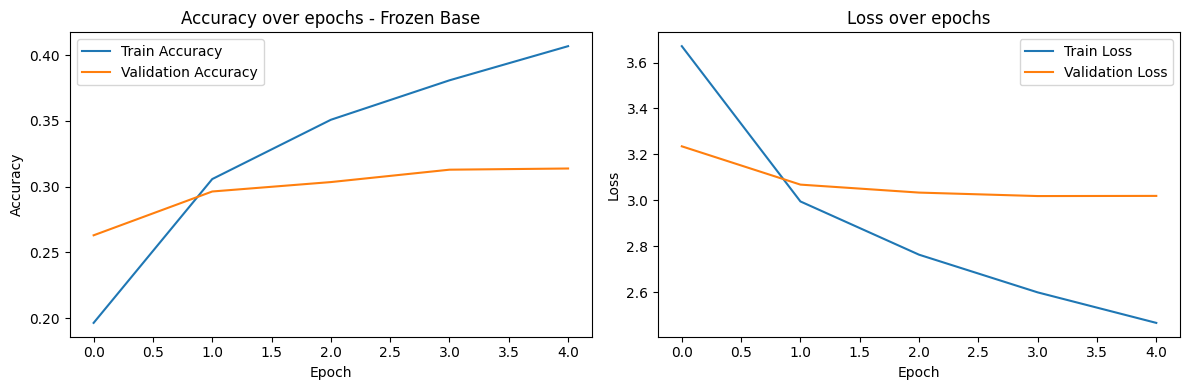

In [25]:
# Plotting Accuracy and Loss for frozen portion of training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(frozen_imagenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(frozen_imagenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs - Frozen Base')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(frozen_imagenet_history.history['loss'], label='Train Loss')
plt.plot(frozen_imagenet_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

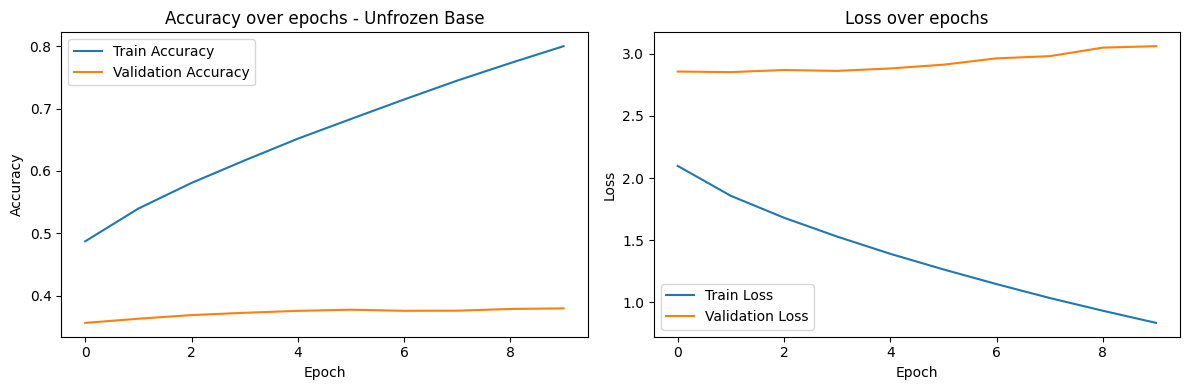

In [26]:
# Plotting Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(unfrozen_imagenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(unfrozen_imagenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs - Unfrozen Base')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(unfrozen_imagenet_history.history['loss'], label='Train Loss')
plt.plot(unfrozen_imagenet_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## Holy overfitting Batman! Let's try adding some regularization and see if it helps

In [27]:
# Create the model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dropout(.5),
    Dense(256, activation='relu'),
    Dropout(.5),
    Dense(200, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the VGG-16 Tiny Imagenet model with frozen base
frozen_imagenet_history = model.fit(
    tiny_imagenet_train_gen,
    epochs=5,
    validation_data=tiny_imagenet_val_gen,
    steps_per_epoch=tiny_imagenet_train_gen.samples // tiny_imagenet_train_gen.batch_size,
    validation_steps=tiny_imagenet_val_gen.samples // tiny_imagenet_val_gen.batch_size
)

# Optional: Unfreeze some layers of the base model and continue training
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the VGG-16 Tiny Imagenet model
unfrozen_imagenet_history = model.fit(
    tiny_imagenet_train_gen,
    epochs=10,
    validation_data=tiny_imagenet_val_gen,
    steps_per_epoch=tiny_imagenet_train_gen.samples // tiny_imagenet_train_gen.batch_size,
    validation_steps=tiny_imagenet_val_gen.samples // tiny_imagenet_val_gen.batch_size
)

Epoch 1/5
1250/1250 [==============================] - 9s 7ms/step - loss: 4.6186 - accuracy: 0.0603 - val_loss: 3.8433 - val_accuracy: 0.1759
Epoch 2/5
1250/1250 [==============================] - 9s 7ms/step - loss: 4.0737 - accuracy: 0.1213 - val_loss: 3.6134 - val_accuracy: 0.2114
Epoch 3/5
1250/1250 [==============================] - 8s 6ms/step - loss: 3.9561 - accuracy: 0.1405 - val_loss: 3.5061 - val_accuracy: 0.2295
Epoch 4/5
1250/1250 [==============================] - 8s 7ms/step - loss: 3.8938 - accuracy: 0.1467 - val_loss: 3.4616 - val_accuracy: 0.2309
Epoch 5/5
1250/1250 [==============================] - 8s 7ms/step - loss: 3.8622 - accuracy: 0.1532 - val_loss: 3.4433 - val_accuracy: 0.2443
Epoch 1/10
1250/1250 [==============================] - 9s 7ms/step - loss: 3.6458 - accuracy: 0.1835 - val_loss: 3.2042 - val_accuracy: 0.2742
Epoch 2/10
1250/1250 [==============================] - 8s 7ms/step - loss: 3.4745 - accuracy: 0.2071 - val_loss: 3.1051 - val_accuracy: 0.29

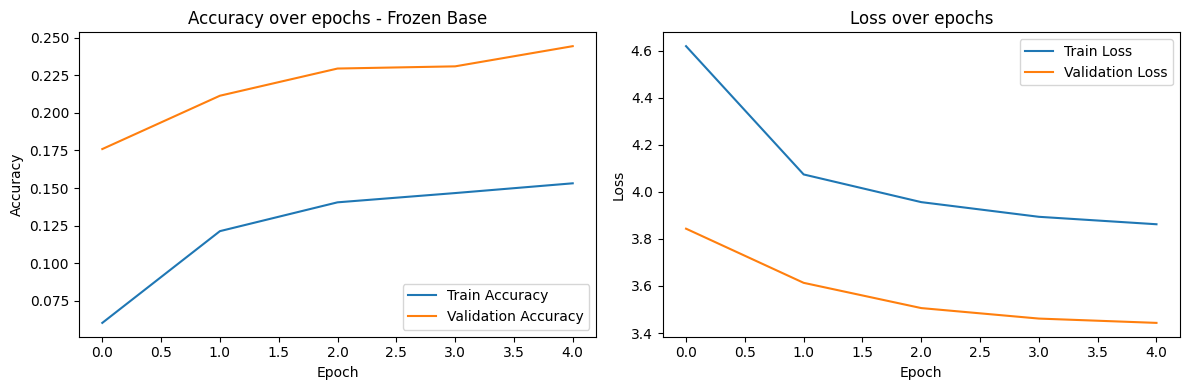

In [28]:
# Plotting Accuracy and Loss for frozen portion of training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(frozen_imagenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(frozen_imagenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs - Frozen Base')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(frozen_imagenet_history.history['loss'], label='Train Loss')
plt.plot(frozen_imagenet_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

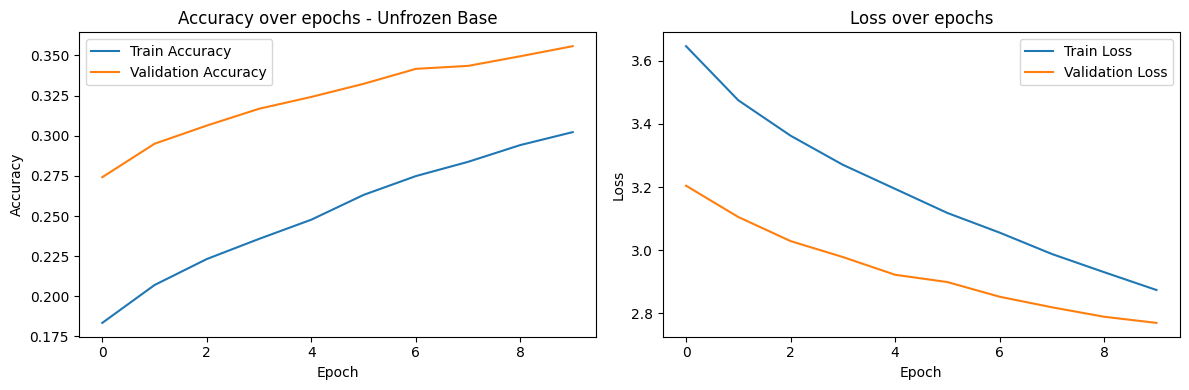

In [29]:
# Plotting Accuracy and Loss for frozen portion of training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(unfrozen_imagenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(unfrozen_imagenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs - Unfrozen Base')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(unfrozen_imagenet_history.history['loss'], label='Train Loss')
plt.plot(unfrozen_imagenet_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## Much better on the overfitting front, but only nominal gains in accuracy. Let's move on to resnet-50